<a href="https://colab.research.google.com/github/samarthgangurde01/Internship-Backorder-Prediction-Project/blob/main/ineuron_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <u>**Project Title:- Back Order Prediction**<u>

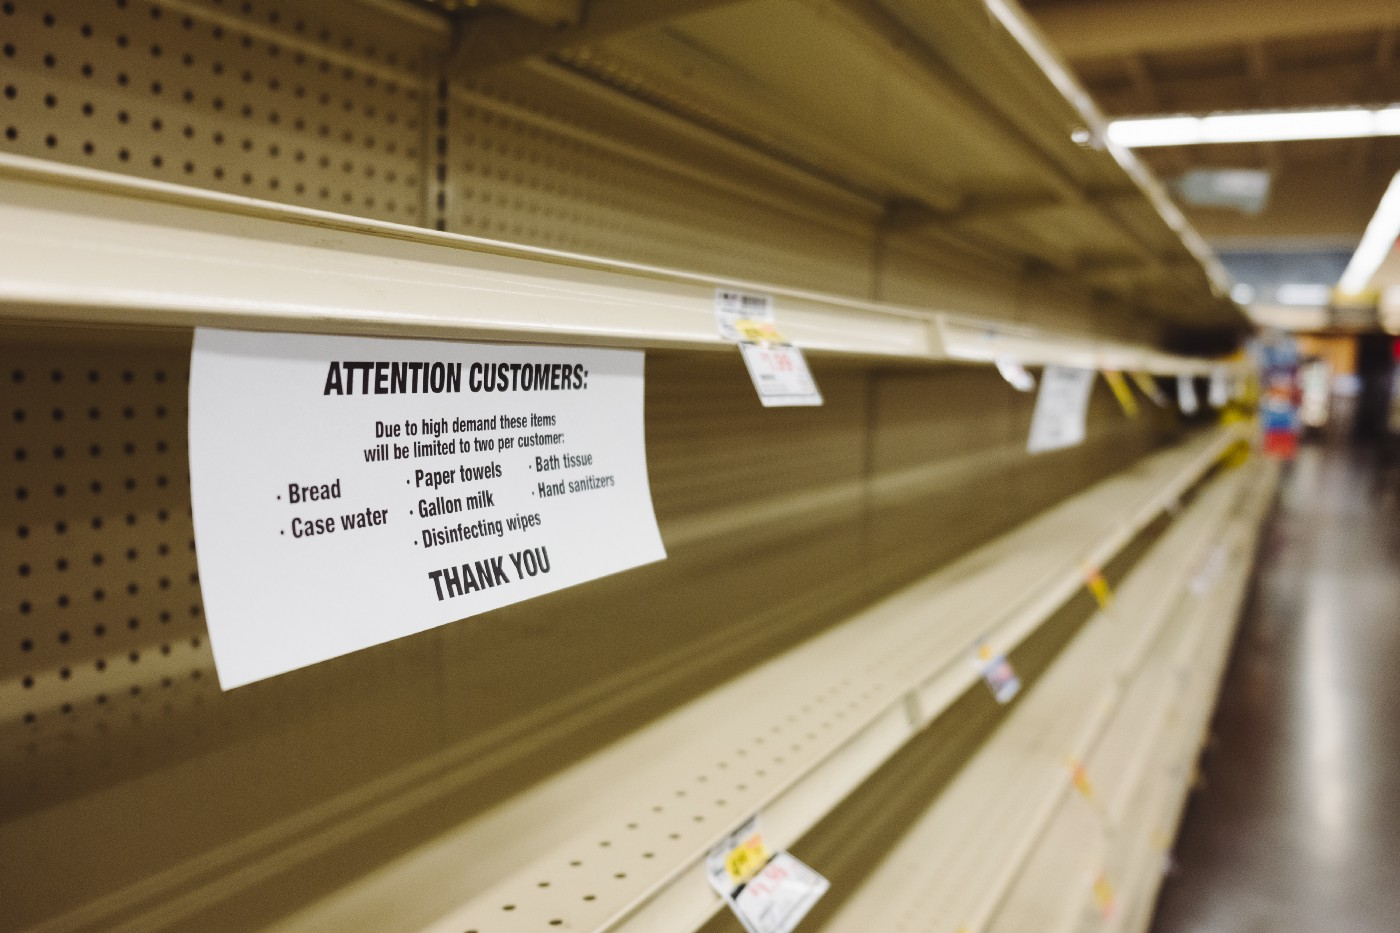

#**Backorders**
https://www.controlerp.com/basics-of-backorder-processing-in-erp-systems/

Backorders are unavoidable, but by anticipating which things will be backordered, 
planning can be streamlined at several levels, preventing unexpected strain on 
production, logistics, and transportation. ERP systems generate a lot of data (mainly 
structured) and also contain a lot of historical data; if this data can be properly utilized, a 
predictive model to forecast backorders and plan accordingly can be constructed. 
Based on past data from inventories, supply chain, and sales, classify the products as 
going into backorder (Yes or No).

## **Reasons behind backorders**

**When there is a sudden increase in demand** : 

The primary goal of all the companies is to increase the demand for the products they offer. Having a poor sales forecast system could one of the reasons for failing to predict the demand. Despite having a good sales forecasting system sometimes these situations are inevitable because of the factors which can’t be controlled or un predictable events.


**Poor Supply chain Management:**

If there is a breakdown at any point in the supply chain or due to improper planning a stockout scenario arises affecting the production. Having limited options for sourcing the raw materials and improper vendor management system is one of the significant reasons for Backorder.


**Inventory Management:**

 Improper management of inventory operations and not having visibility of the inventory storage could lead to Backorders.

Link:-https://www.shipbob.com/blog/backordered-meaning/ 

#**Loading the dataset**

In [1]:
#Loading the necessary libraries 
import numpy as np
import pandas as pd
from numpy import math,unique
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Importing the dataset
train_df = pd.read_csv('/content/drive/MyDrive/Copy of Kaggle_Training_Dataset_v2.csv')


## **Dataset Discripation:**

In the Train dataset we are provided with 23 columns(Features) of data.

* Sku(Stock Keeping unit) : The product id — Unique for each row so can be ignored

* National_inv : The present inventory level of the product

* Lead_time : Transit time of the product

* In_transit_qty : The amount of product in transit

* Forecast_3_month , Forecast_6_month , Forecast_9_month : Forecast of the sales of the product for coming 3 , 6 and 9 months respectively

* Sales_1_month , sales_3_month ,sales_6_month , sales_9_month : Actual sales of the product in last 1 , 3 ,6 and 9 months respectively

*  Min_bank : Minimum amount of stock recommended

* Potential_issue : Any problem identified in the product/part

* Pieces_past_due: Amount of parts of the product overdue if any

* Perf_6_month_avg , perf_12_month_avg : Product performance over past 6 and 12 months respectively

* Local_bo_qty : Amount of stock overdue

* Deck_risk , oe_constraint, ppap_risk, stop_auto_buy, rev_stop : Different Flags (Yes or No) set for the product

* Went_on_backorder : Target variable(Products that went to Backorder(‘Yes’) to those which didn’t go to Backorder(‘No’)

In [4]:
train_df.head(5)

sku  national_inv  lead_time  in_transit_qty  forecast_3_month  \
0  1026827           0.0        NaN             0.0               0.0   
1  1043384           2.0        9.0             0.0               0.0   
2  1043696           2.0        NaN             0.0               0.0   
3  1043852           7.0        8.0             0.0               0.0   
4  1044048           8.0        NaN             0.0               0.0   

   forecast_6_month  forecast_9_month  sales_1_month  sales_3_month  \
0               0.0               0.0            0.0            0.0   
1               0.0               0.0            0.0            0.0   
2               0.0               0.0            0.0            0.0   
3               0.0               0.0            0.0            0.0   
4               0.0               0.0            0.0            0.0   

   sales_6_month  ...  pieces_past_due  perf_6_month_avg perf_12_month_avg  \
0            0.0  ...              0.0            -99.00            -99.00   
1            0.0  ...              0.0              0.99              0.99   
2            0.0  ...              0.0            -99.00            -99.00   
3            0.0  ...              0.0              0.10              0.13   
4            0.0  ...              0.0            -99.00            -99.00   

   local_bo_qty  deck_risk  oe_constraint  ppap_risk stop_auto_buy rev_stop  \
0           0.0         No             No         No           Yes       No   
1           0.0         No             No         No           Yes       No   
2           0.0        Yes             No         No           Yes       No   
3           0.0         No             No         No           Yes       No   
4           0.0        Yes             No         No           Yes       No   

  went_on_backorder  
0                No  
1                No  
2                No  
3                No  
4                No  

[5 rows x 23 columns]

In [5]:
print(train_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1687861 non-null  object 
 1   national_inv       1687860 non-null  float64
 2   lead_time          1586967 non-null  float64
 3   in_transit_qty     1687860 non-null  float64
 4   forecast_3_month   1687860 non-null  float64
 5   forecast_6_month   1687860 non-null  float64
 6   forecast_9_month   1687860 non-null  float64
 7   sales_1_month      1687860 non-null  float64
 8   sales_3_month      1687860 non-null  float64
 9   sales_6_month      1687860 non-null  float64
 10  sales_9_month      1687860 non-null  float64
 11  min_bank           1687860 non-null  float64
 12  potential_issue    1687860 non-null  object 
 13  pieces_past_due    1687860 non-null  float64
 14  perf_6_month_avg   1687860 non-null  float64
 15  perf_12_month_avg  1687860 non-n

##**Data preparation**

In [6]:
#printing first 5 rows of train_df
train_df.head(5)

sku  national_inv  lead_time  in_transit_qty  forecast_3_month  \
0  1026827           0.0        NaN             0.0               0.0   
1  1043384           2.0        9.0             0.0               0.0   
2  1043696           2.0        NaN             0.0               0.0   
3  1043852           7.0        8.0             0.0               0.0   
4  1044048           8.0        NaN             0.0               0.0   

   forecast_6_month  forecast_9_month  sales_1_month  sales_3_month  \
0               0.0               0.0            0.0            0.0   
1               0.0               0.0            0.0            0.0   
2               0.0               0.0            0.0            0.0   
3               0.0               0.0            0.0            0.0   
4               0.0               0.0            0.0            0.0   

   sales_6_month  ...  pieces_past_due  perf_6_month_avg perf_12_month_avg  \
0            0.0  ...              0.0            -99.00            -99.00   
1            0.0  ...              0.0              0.99              0.99   
2            0.0  ...              0.0            -99.00            -99.00   
3            0.0  ...              0.0              0.10              0.13   
4            0.0  ...              0.0            -99.00            -99.00   

   local_bo_qty  deck_risk  oe_constraint  ppap_risk stop_auto_buy rev_stop  \
0           0.0         No             No         No           Yes       No   
1           0.0         No             No         No           Yes       No   
2           0.0        Yes             No         No           Yes       No   
3           0.0         No             No         No           Yes       No   
4           0.0        Yes             No         No           Yes       No   

  went_on_backorder  
0                No  
1                No  
2                No  
3                No  
4                No  

[5 rows x 23 columns]

In [ ]:
#Importing dataprep fro the help of data analysis
!pip install dataprep

     |████████████████████████████████| 9.5 MB 9.0 MB/s 
     |████████████████████████████████| 1.1 MB 49.8 MB/s 
     |████████████████████████████████| 1.0 MB 53.4 MB/s 
     |████████████████████████████████| 965 kB 61.3 MB/s 
     |████████████████████████████████| 749 kB 61.8 MB/s 
     |████████████████████████████████| 366 kB 66.5 MB/s 
     |████████████████████████████████| 1.5 MB 61.6 MB/s 
     |████████████████████████████████| 943 kB 55.7 MB/s 
     |████████████████████████████████| 78 kB 9.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 11.1 MB 54.6 MB/s 
     |████████████████████████████████| 133 kB 75.5 MB/s 
     |████████████████████████████████| 95 kB 5.2 MB/s 
     |████████████████████████████████| 50 kB 8.5 MB/s 
     |████████████████████████████████| 271 kB 76.0 MB/s 
     |████████████████████████████████| 144 kB 66.3 MB/s 
     |████

In [ ]:
#loading necessary packages for the dataprep
from dataprep.eda import *
from dataprep.datasets import load_dataset
from dataprep.eda import plot, plot_correlation, plot_missing, plot_diff, create_report

DataPrep Report
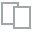
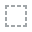
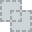
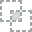
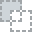
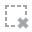
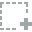
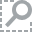
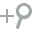
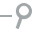
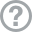
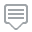
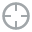
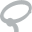
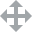
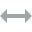
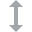
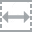
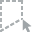
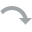
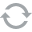
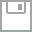
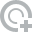
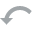
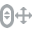
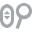
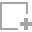
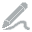
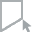
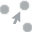
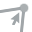
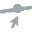

In [ ]:
create_report(train_df)

In [7]:
#printing first 5 rows of train_df
train_df.head(5)

sku  national_inv  lead_time  in_transit_qty  forecast_3_month  \
0  1026827           0.0        NaN             0.0               0.0   
1  1043384           2.0        9.0             0.0               0.0   
2  1043696           2.0        NaN             0.0               0.0   
3  1043852           7.0        8.0             0.0               0.0   
4  1044048           8.0        NaN             0.0               0.0   

   forecast_6_month  forecast_9_month  sales_1_month  sales_3_month  \
0               0.0               0.0            0.0            0.0   
1               0.0               0.0            0.0            0.0   
2               0.0               0.0            0.0            0.0   
3               0.0               0.0            0.0            0.0   
4               0.0               0.0            0.0            0.0   

   sales_6_month  ...  pieces_past_due  perf_6_month_avg perf_12_month_avg  \
0            0.0  ...              0.0            -99.00            -99.00   
1            0.0  ...              0.0              0.99              0.99   
2            0.0  ...              0.0            -99.00            -99.00   
3            0.0  ...              0.0              0.10              0.13   
4            0.0  ...              0.0            -99.00            -99.00   

   local_bo_qty  deck_risk  oe_constraint  ppap_risk stop_auto_buy rev_stop  \
0           0.0         No             No         No           Yes       No   
1           0.0         No             No         No           Yes       No   
2           0.0        Yes             No         No           Yes       No   
3           0.0         No             No         No           Yes       No   
4           0.0        Yes             No         No           Yes       No   

  went_on_backorder  
0                No  
1                No  
2                No  
3                No  
4                No  

[5 rows x 23 columns]

In [8]:
#From the dataprep, we can get to know that, 2 variables 'local_bo_qty' and 'pieces_past_due' are having 98.5% and 98.62% missing values.
#As Sku is Id provided for each row (we can remove it too)
#Lets drop these 3 variables
train_df.drop(['local_bo_qty','pieces_past_due','sku'],axis=1,inplace=True)

In [10]:
# #There are other column with missing values as well
# # sales of 1,2,6 and 9 months
# sales_variables = ['sales_1_month','sales_3_month','sales_6_month','sales_9_month']
# for i in sales_variables:
#   plt.figure(figsize=(10,6))
#   sns.distplot(train_df[i])

##**Treating missing values**

In [9]:
#printing null values from each column
train_df.isna().sum()
## 5.98% of the values are missing in lead_time

national_inv              1
lead_time            100894
in_transit_qty            1
forecast_3_month          1
forecast_6_month          1
forecast_9_month          1
sales_1_month             1
sales_3_month             1
sales_6_month             1
sales_9_month             1
min_bank                  1
potential_issue           1
perf_6_month_avg          1
perf_12_month_avg         1
deck_risk                 1
oe_constraint             1
ppap_risk                 1
stop_auto_buy             1
rev_stop                  1
went_on_backorder         1
dtype: int64

In [10]:
#replacing missing values with median
train_df['lead_time'].fillna(train_df.lead_time.median(), inplace=True)

In [11]:
#dropping all remaining null values
train_df=train_df.dropna()

In [12]:
train_df.isna().sum()

national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
potential_issue      0
perf_6_month_avg     0
perf_12_month_avg    0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
went_on_backorder    0
dtype: int64

In [13]:
#printing leadtime value counts in two sub group 1st more than 10 and 2nd less than 10
print(train_df['lead_time'][train_df['lead_time']<10].value_counts())
print('\n*********************\n')
train_df['lead_time'][train_df['lead_time']>10].value_counts()


8.0    783079
2.0    337402
4.0    128537
9.0    123649
3.0     16253
0.0     10511
6.0      5365
5.0      4031
7.0       209
1.0        21
Name: lead_time, dtype: int64

*********************



12.0    199700
52.0     30113
14.0     10314
16.0      8843
13.0      5405
15.0      3812
17.0      3763
11.0      1094
20.0       416
30.0       312
18.0       221
22.0       133
24.0       115
26.0       105
28.0        84
21.0        49
40.0        48
35.0        35
19.0        28
23.0        14
25.0         7
Name: lead_time, dtype: int64

In [14]:
#Cheaking value counts of neumerical columns
for i in train_df.columns:
    if train_df[i].nunique() > 2:
       if train_df[i].nunique() > 2:
               print(train_df[i].value_counts())
               print('\n******\n')

 0.0        108425
 2.0        107869
 3.0         90577
 4.0         69588
 5.0         58916
             ...  
 8928.0          1
 14216.0         1
 8153.0          1
 59796.0         1
-208.0           1
Name: national_inv, Length: 14969, dtype: int64

******

8.0     783079
2.0     337402
12.0    199700
4.0     128537
9.0     123649
52.0     30113
3.0      16253
10.0     14192
0.0      10511
14.0     10314
16.0      8843
13.0      5405
6.0       5365
5.0       4031
15.0      3812
17.0      3763
11.0      1094
20.0       416
30.0       312
18.0       221
7.0        209
22.0       133
24.0       115
26.0       105
28.0        84
21.0        49
40.0        48
35.0        35
19.0        28
1.0         21
23.0        14
25.0         7
Name: lead_time, dtype: int64

******

0.0        1344662
1.0          36515
2.0          22236
3.0          17189
4.0          15364
            ...   
2037.0           1
7066.0           1
4706.0           1
25446.0          1
2479.0           1
Name: 

In [15]:
#Assigning all the categorical columns to categorical_columns variable
categorical_columns = []
for i in train_df.columns:
  if train_df[i].nunique() < 4:
    categorical_columns.append(i)
  


In [16]:
#cheakig value counts of categorical columns
for i in categorical_columns:
  print(train_df[i].value_counts())
  print('\n***********\n')

No     1686953
Yes        907
Name: potential_issue, dtype: int64

***********

No     1300377
Yes     387483
Name: deck_risk, dtype: int64

***********

No     1687615
Yes        245
Name: oe_constraint, dtype: int64

***********

No     1484026
Yes     203834
Name: ppap_risk, dtype: int64

***********

Yes    1626774
No       61086
Name: stop_auto_buy, dtype: int64

***********

No     1687129
Yes        731
Name: rev_stop, dtype: int64

***********

No     1676567
Yes      11293
Name: went_on_backorder, dtype: int64

***********



In [17]:
#
train_df.describe().T

count        mean           std      min   25%    50%  \
national_inv       1687860.0  496.111782  29615.233831 -27256.0  4.00  15.00   
lead_time          1687860.0    7.879902      6.841952      0.0  4.00   8.00   
in_transit_qty     1687860.0   44.052022   1342.741731      0.0  0.00   0.00   
forecast_3_month   1687860.0  178.119284   5026.553102      0.0  0.00   0.00   
forecast_6_month   1687860.0  344.986664   9795.151861      0.0  0.00   0.00   
forecast_9_month   1687860.0  506.364431  14378.923562      0.0  0.00   0.00   
sales_1_month      1687860.0   55.926069   1928.195879      0.0  0.00   0.00   
sales_3_month      1687860.0  175.025930   5192.377625      0.0  0.00   1.00   
sales_6_month      1687860.0  341.728839   9613.167104      0.0  0.00   2.00   
sales_9_month      1687860.0  525.269701  14838.613523      0.0  0.00   4.00   
min_bank           1687860.0   52.772303   1254.983089      0.0  0.00   0.00   
perf_6_month_avg   1687860.0   -6.872059     26.556357    -99.0  0.63   0.82   
perf_12_month_avg  1687860.0   -6.437947     25.843331    -99.0  0.66   0.81   

                     75%         max  
national_inv       80.00  12334404.0  
lead_time           8.00        52.0  
in_transit_qty      0.00    489408.0  
forecast_3_month    4.00   1427612.0  
forecast_6_month   12.00   2461360.0  
forecast_9_month   20.00   3777304.0  
sales_1_month       4.00    741774.0  
sales_3_month      15.00   1105478.0  
sales_6_month      31.00   2146625.0  
sales_9_month      47.00   3205172.0  
min_bank            3.00    313319.0  
perf_6_month_avg    0.97         1.0  
perf_12_month_avg   0.95         1.0

##**EDA**

In [20]:
# create_report(train_df)

In [18]:
#asigning all Numerical columns to num_column for further use 
Num_column = [column for column in train_df.columns if train_df[column].dtype != 'object']
#printing all Numerical columns
Num_column

['national_inv',
 'lead_time',
 'in_transit_qty',
 'forecast_3_month',
 'forecast_6_month',
 'forecast_9_month',
 'sales_1_month',
 'sales_3_month',
 'sales_6_month',
 'sales_9_month',
 'min_bank',
 'perf_6_month_avg',
 'perf_12_month_avg']

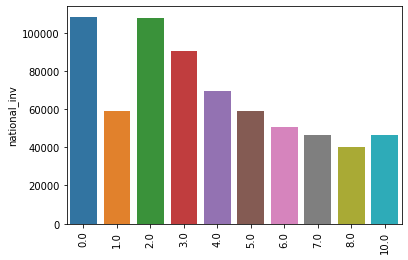

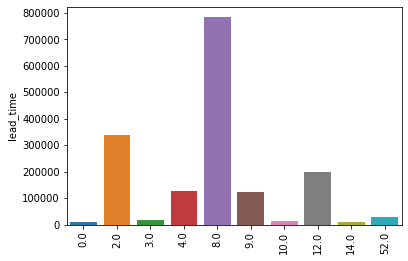

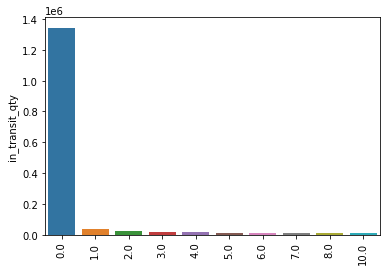

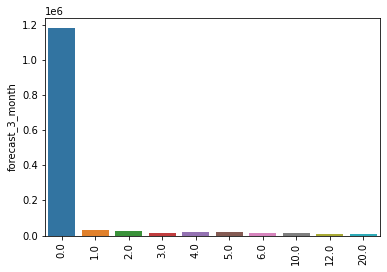

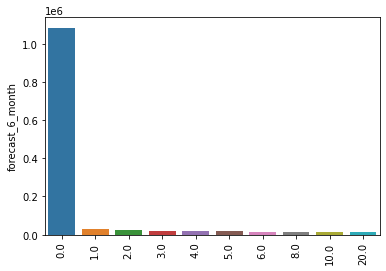

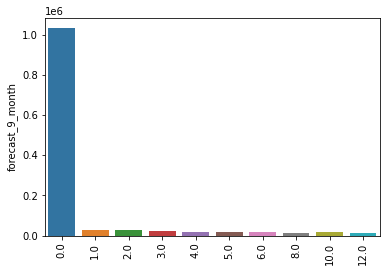

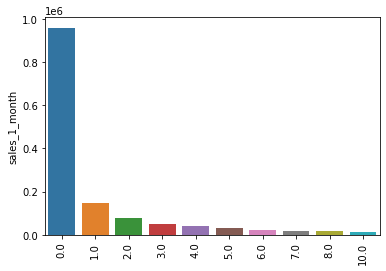

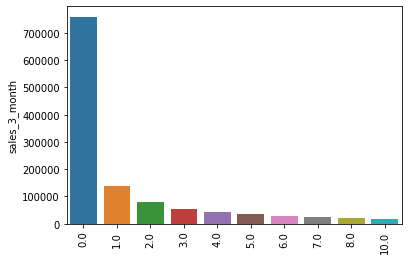

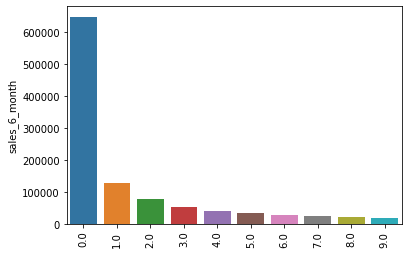

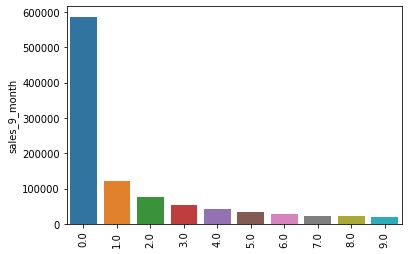

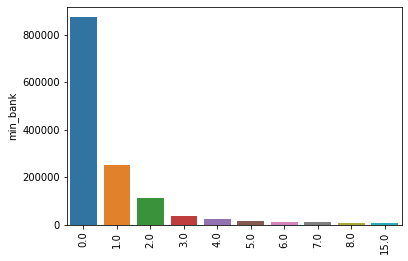

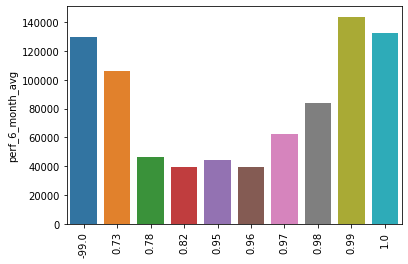

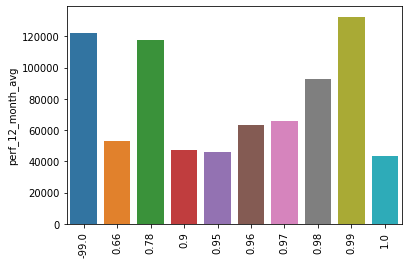

In [19]:
#Plotting bar plot to understanding value_count distribution of every numerical variable 
for col in Num_column:
  #considering top 10 counts for each numerical variable 
  sns.barplot(x=train_df[col].value_counts().head(10).index ,y= train_df[col].value_counts().head(10))
  plt.xticks(rotation=90)
  plt.show()



### **Observations:-**
**national_inv:-**‘Inventory levels’ refers to the amount of inventory 
you have available throughout your entire distribution network. 
As you can see in bar chart most of our products shows 0(zero) Inventory levels
from remaining products you will notice 2 Inventory levels as most repeating number 

**lead_time:-**is the amount of time between a merchant placing an order and the manufacturer completing it
your will notice in bar chart most of the products showing 8 days as their leadtime 
and very few of them 0 and 14 as their lead time 

**In_transit_qty:-**refers to inventory items and other products that have been shipped by a seller,
but have not yet reached the purchaser
Most of the products shows 0(zero) in_transit_qty 

**forecast_3_month,forecast_6_month,forecast_9_month:-**Prediction of the sales of the product for coming 3,6,9 month 
You will notice that most of the products are not showing  any forecast for 3,6,9 months 

**sales_1_month, sales_3_month, sales_6_month, sales_9_month:-** it refers to last 1,3,6,9 months product sales
we can conclude that most of our products havent saled in last 1,3,6,9 months ,where as from remaining  products 15000 products saled one time in last 1 month,approx 10000 products saled two times inn last one month 



In [20]:
#asigning all categorical columns to cat_column for further use 
cat_column = [i for i in categorical_columns]

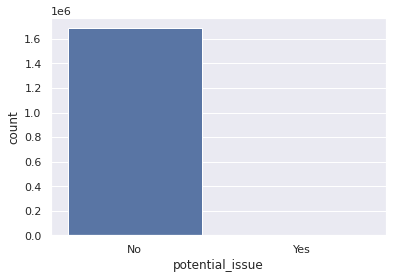

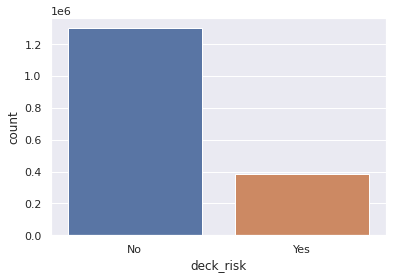

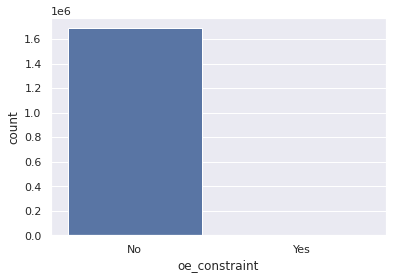

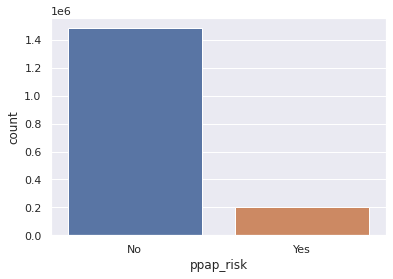

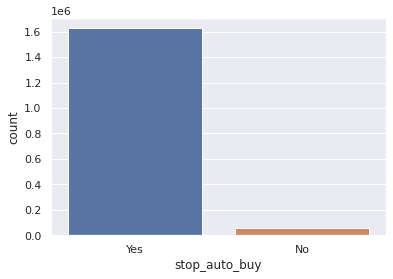

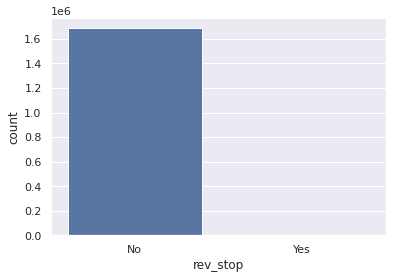

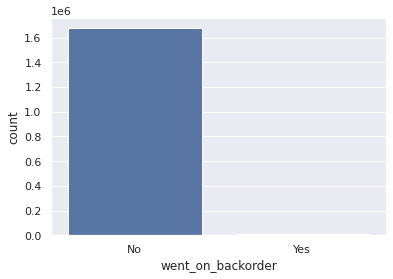

In [21]:
#Plotting countplot to understanding value_count distribution of every categorical variable 
for col in cat_column:
    sns.set_theme(style="darkgrid")
    sns.countplot(train_df[col],data=train_df)
    plt.show()

In [22]:
# counting the went_on_backorder variable from data set
train_df['went_on_backorder'].value_counts()

No     1676567
Yes      11293
Name: went_on_backorder, dtype: int64

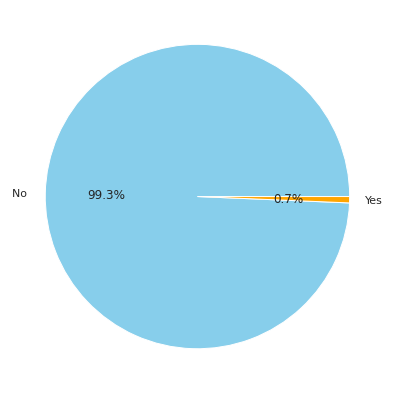

In [23]:
#Ploting pie plot to understand the distribution went_on_backorder variable
Went_or_not = ['No ','Yes']
data=train_df['went_on_backorder'].value_counts() 
colors = ['skyblue', 'orange']
highlight =(0,0)
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = Went_or_not,autopct='%1.1f%%',colors=colors)
 # show plot
plt.show()

**We have imbalnce dependent variable with 99.3% NO and only 0.7% YES if we used it as it is, it will direct impact on our model accuracy, in further process we will try to improve them by using SMOTE**

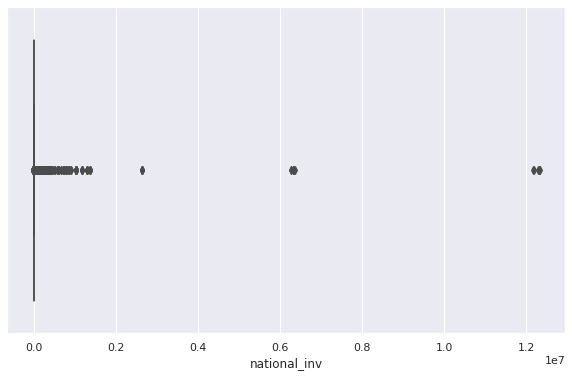

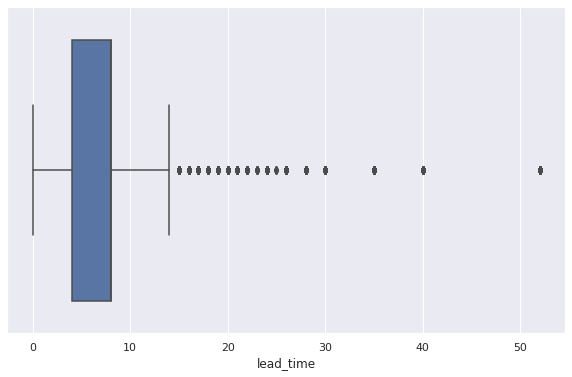

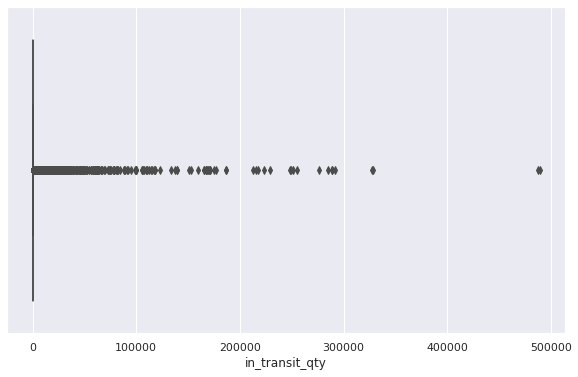

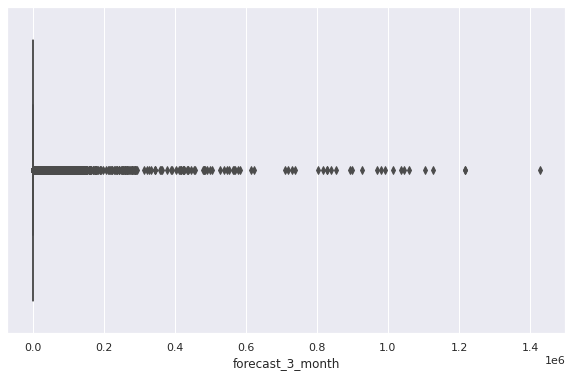

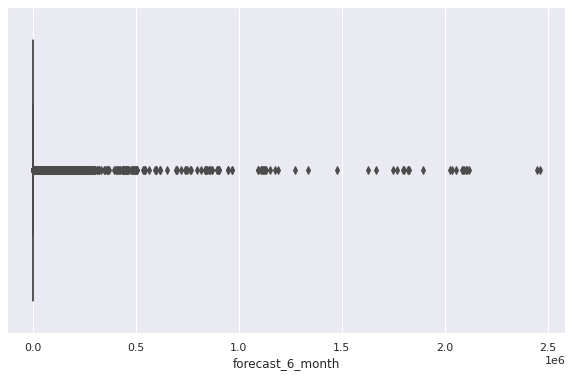

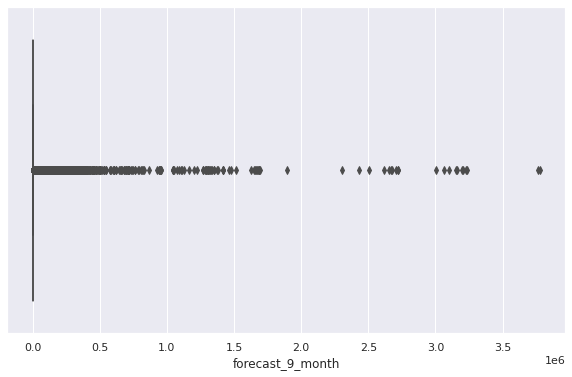

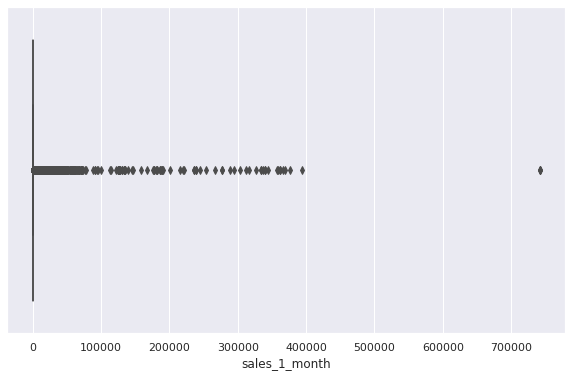

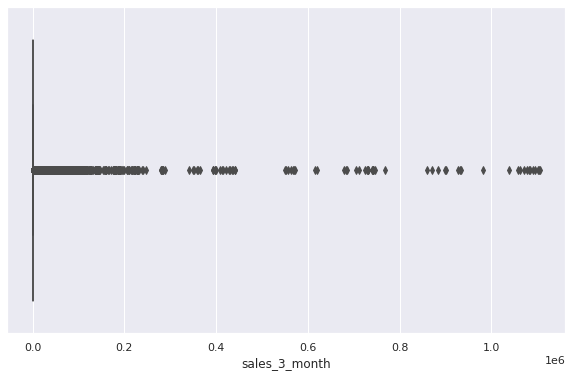

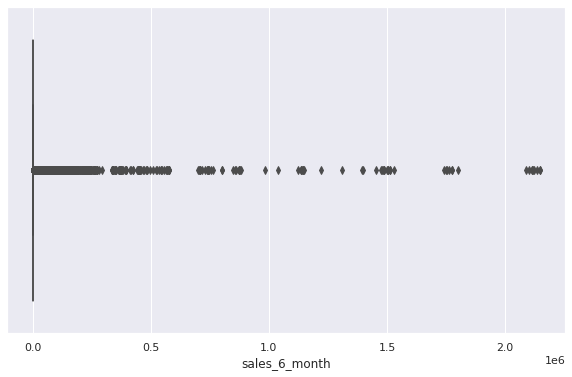

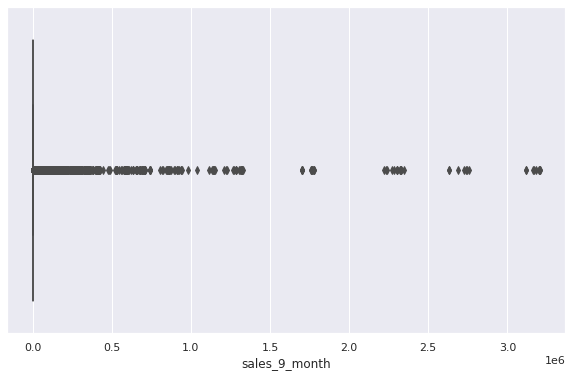

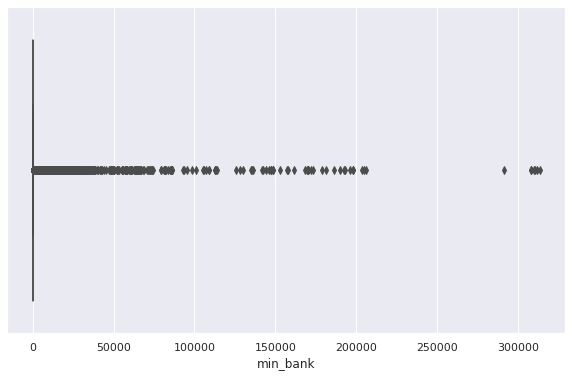

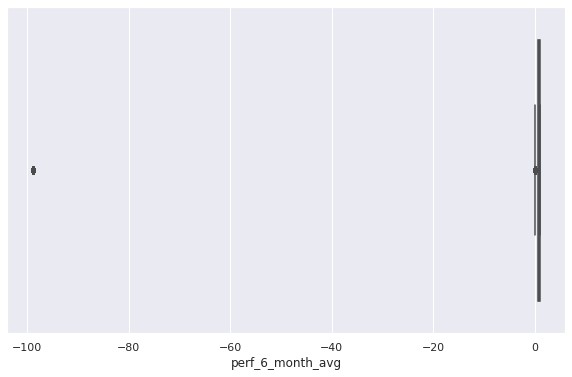

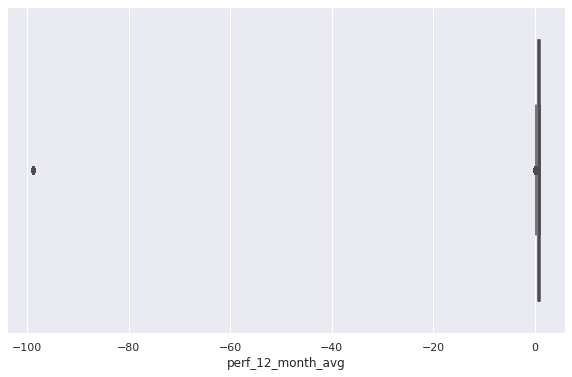

In [24]:
#ploting box plot to indentify the outlers of Numerical columns
for col in Num_column:
  plt.figure(figsize=(10,6))
  sns.boxplot(train_df[col])
  plt.show()

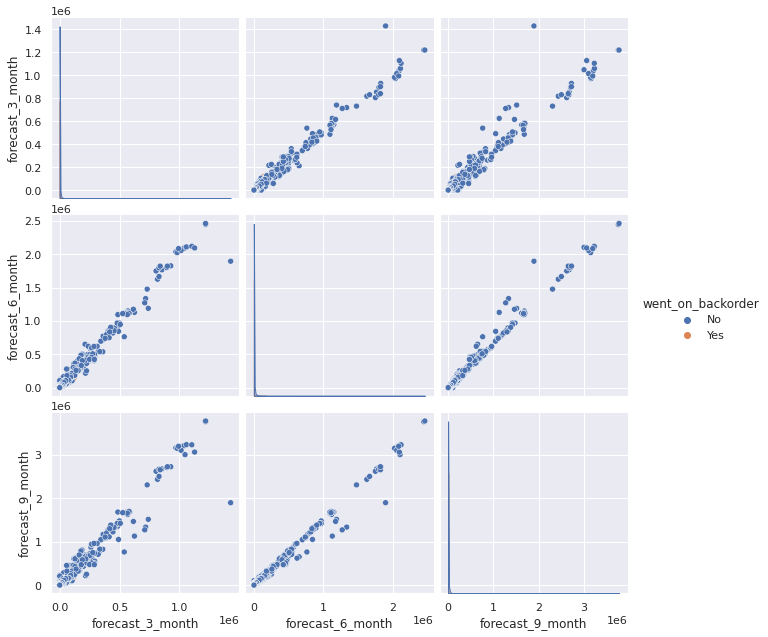

In [ ]:
# Understanding  correlations of Forecast columns by using pairplot.
forecasts = ['forecast_3_month','forecast_6_month', 'forecast_9_month']
sns.pairplot(data = train_df, vars=forecasts, hue='went_on_backorder', height=3)
plt.show()

**Here as you can see all forecast variables are creating linear co-relation with each other** 

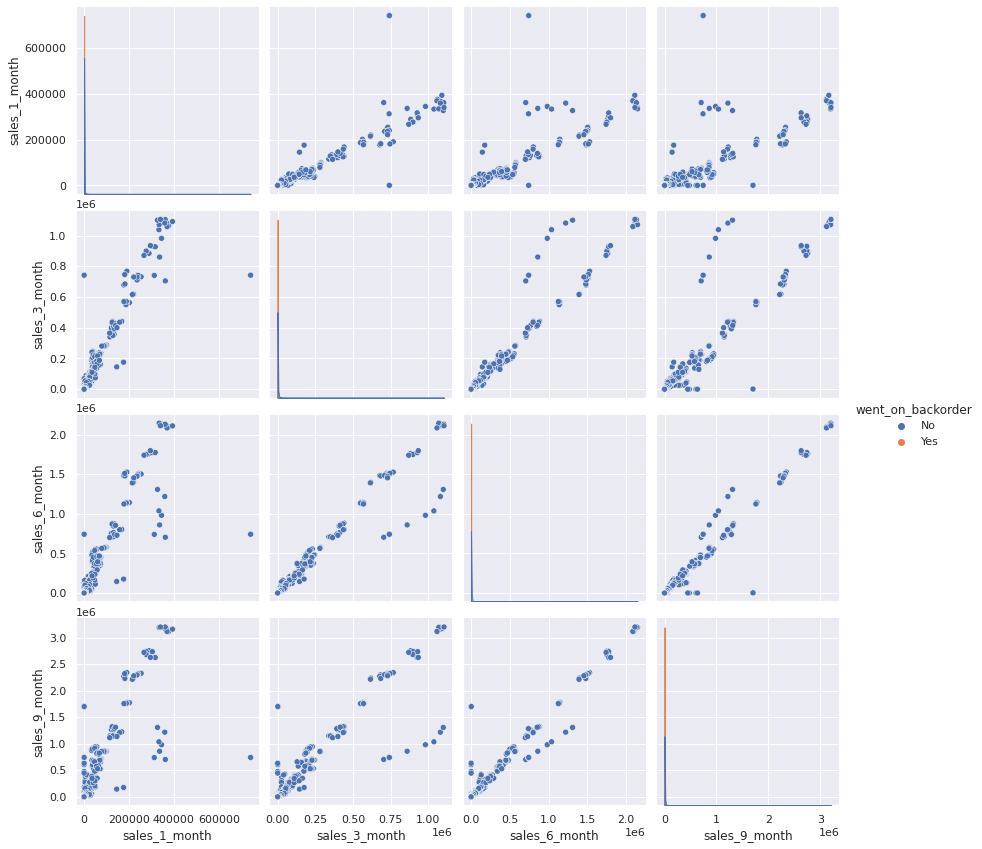

In [ ]:
# Understanding  correlations of Sales columns by using pairplot.
sales = ['sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month']
sns.pairplot(data=train_df, vars=sales, hue='went_on_backorder', height=3)
plt.show()

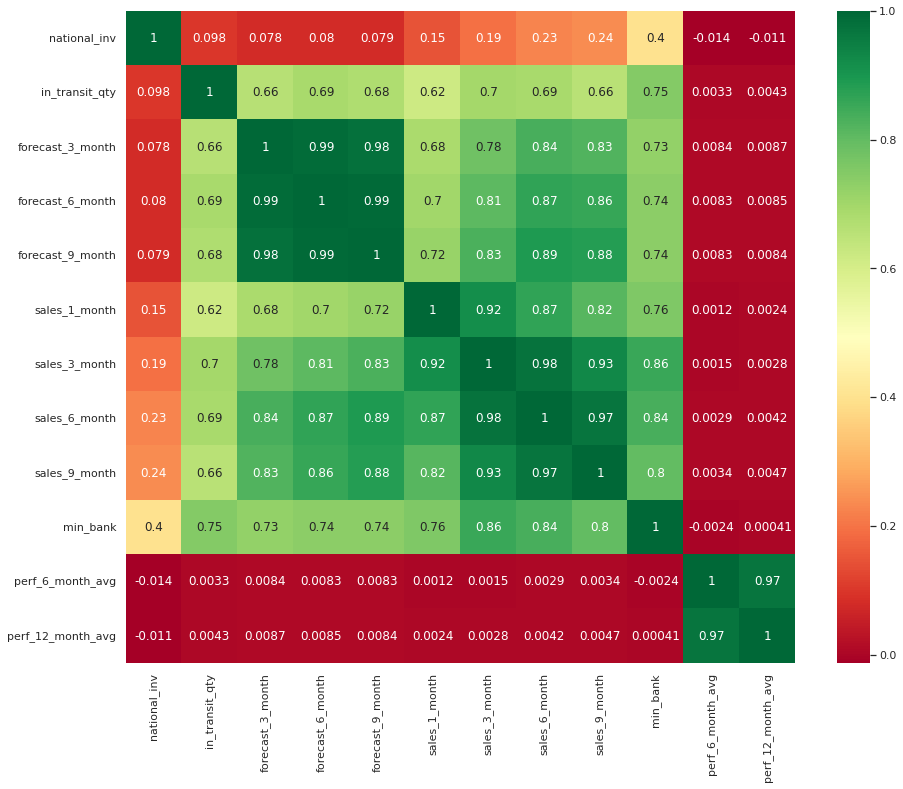

In [ ]:
#Lets see the correlation of all the variables by using heatmap
plt.figure(figsize=(15,12))
sns.heatmap(train_df.corr(),annot=True,cmap='RdYlGn')

### **Oberservations**
* **forecast_3_month , forecast_6_month and forecast_9_month are very strogly correlated with each other with 0.99 degree**
* **sales_1_month, sales_3_month, sales_6_month and sales_9_month are strongly correlated with each other with a degree varying from 0.82 to 0.98.**
* **forecast and sale columns are correlated with each other with a minimum degree of 0.62 varying upto 0.88. It is obvious that when the sales for a certain products is high in the past sales the forecast for the same in the coming months will be higher and viceversa.**

* **perf_6_month_avg and perf_12_month_avg are very highly correlated with each other to a degree of 0.97.**

* **min_bank ( minimum amount of stock recommended ) is highly correlated with sales and forecast columns as stock in inventory is directly proportional to sales.**

* **in_transit_qty is highly correlated with sales, forecast and min_bank columns. This is obvious because high sales of a product => more of that product in transport for inventory replenishing high sales of a product => high forecast.**

* **national_inv is meekly correlated with min_bank and weekly correlated with sale columns.**


##**Outlier's treatment**

In [25]:
#capping outliers to upper and lower limit
def treat_outliers_numeric(df2):
  for i in list(df2.describe().columns):
  #Finding IQR
    Q3, Q1 = np.percentile(df2[i], [75 ,25])
    IQR = Q3 - Q1
    upper = Q3 +1.5*IQR
    lower = Q1 - 1.5*IQR
    df2.loc[df2[i]>upper,i] = upper
    df2.loc[df2[i]<lower,i] = lower
    plt.figure(figsize=(15,6))
    plt.title('After Outlier Treatment')
    plt.subplot(1, 2, 1)
    sns.boxplot(df2[i])
    plt.subplot(1, 2, 2)
    sns.distplot(df2[i])


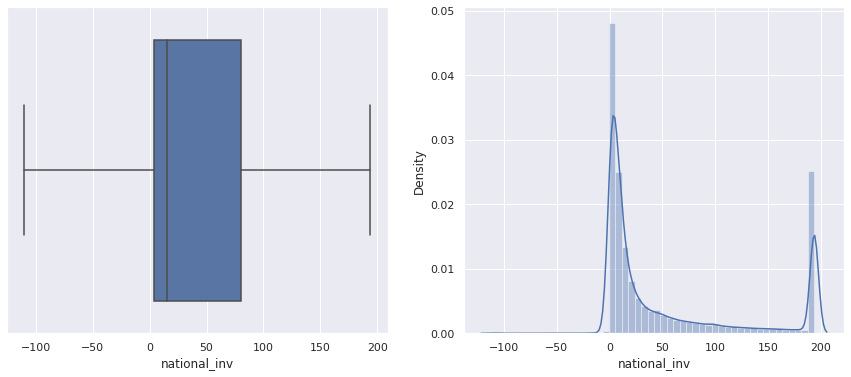

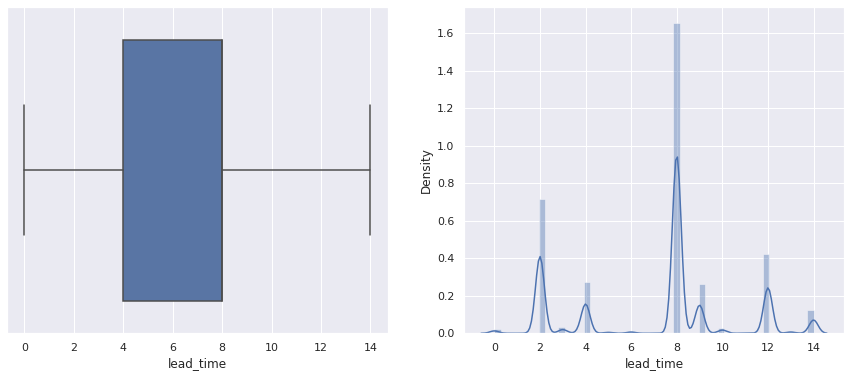

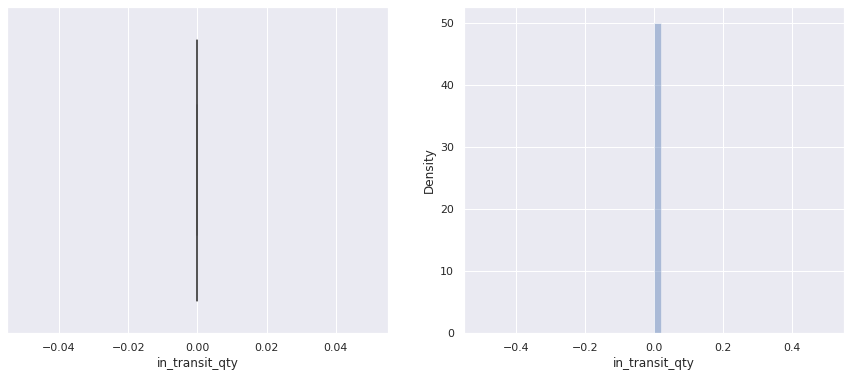

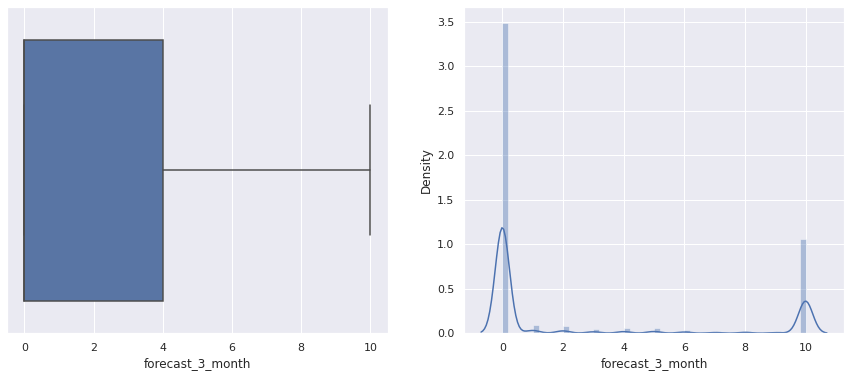

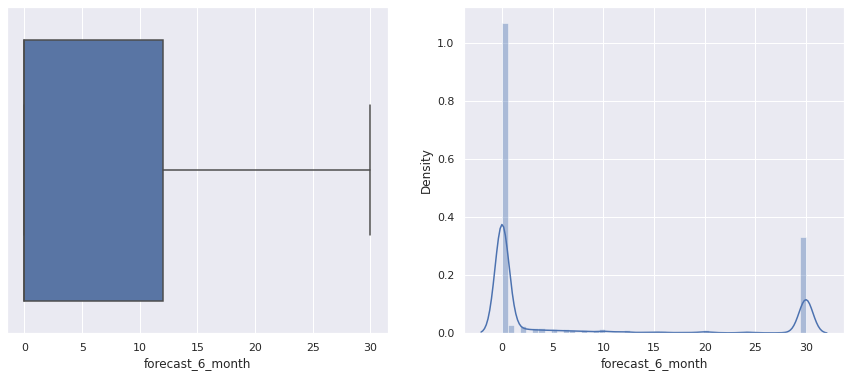

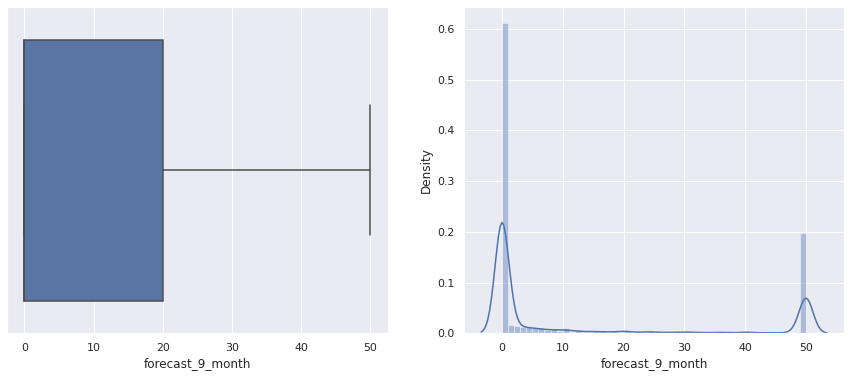

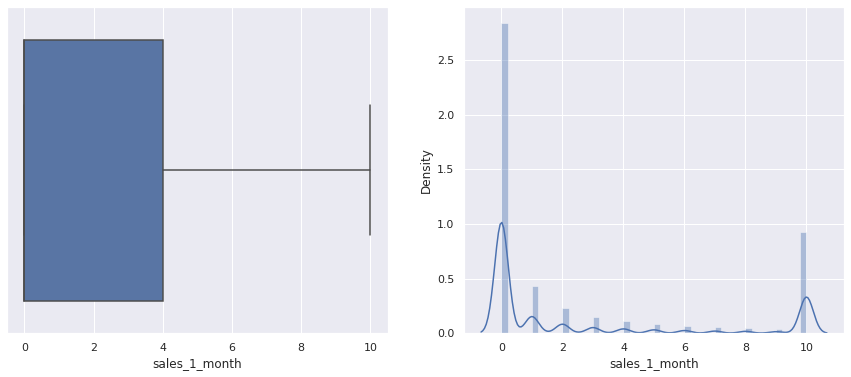

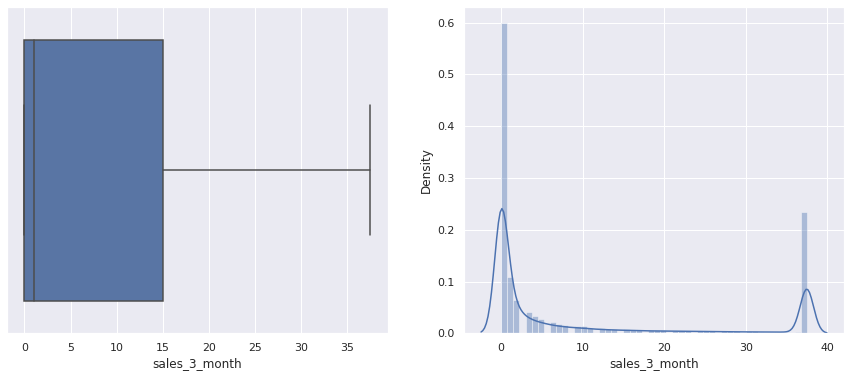

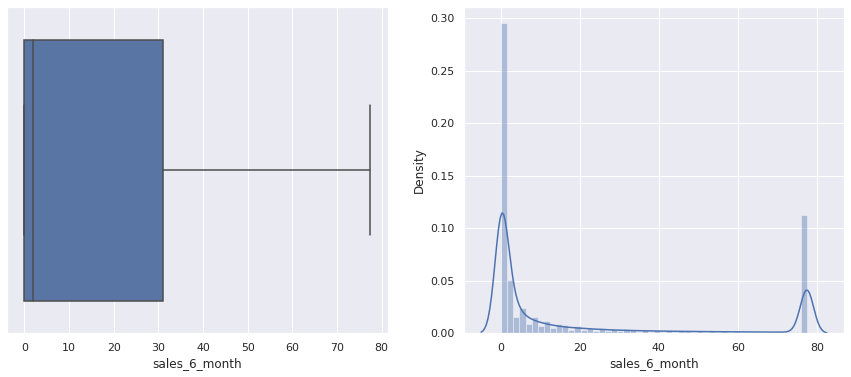

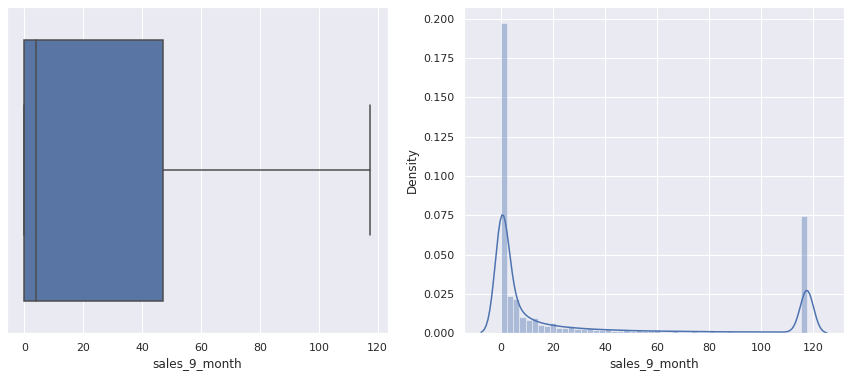

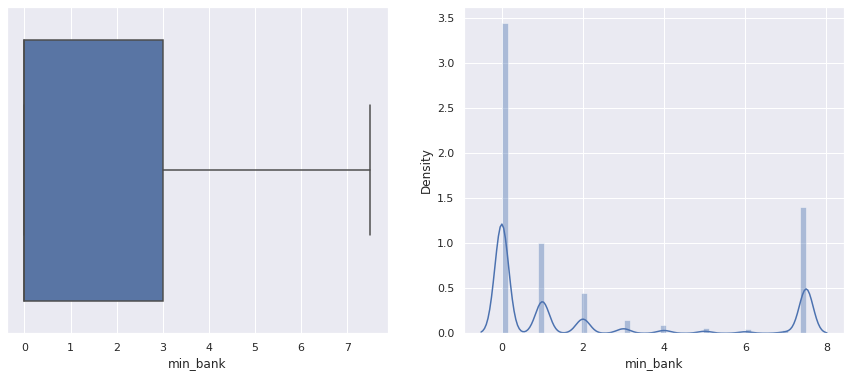

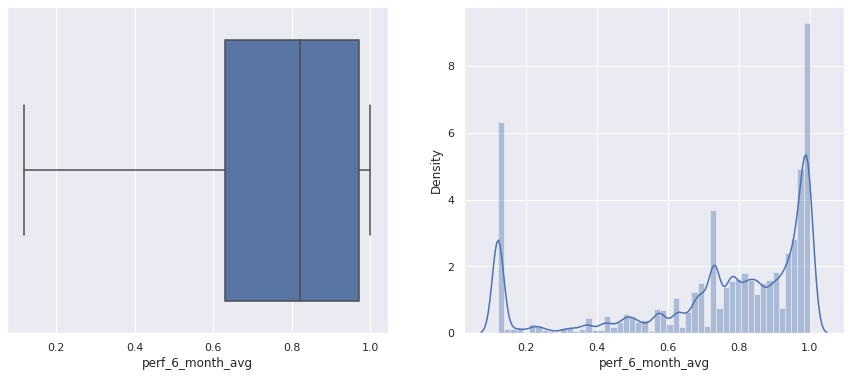

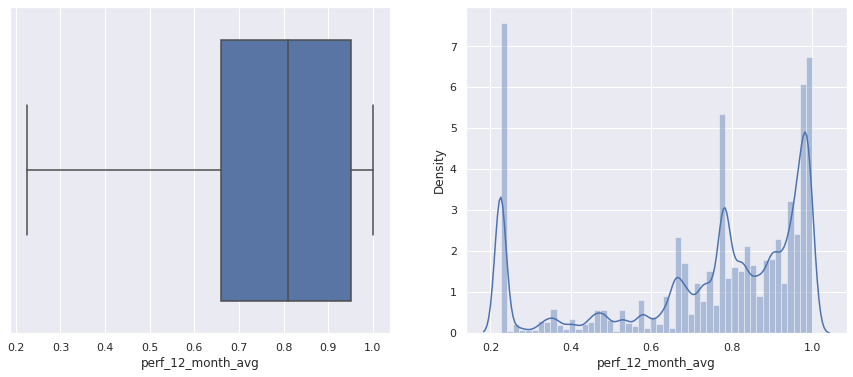

In [26]:
treat_outliers_numeric(train_df)

In [27]:
#Printing value counts of coloumn in_transit_qty
cols_to_be_checked = ['in_transit_qty']
for i in cols_to_be_checked:
  print(train_df[i].value_counts())

0.0    1687860
Name: in_transit_qty, dtype: int64


In [28]:
#We can see that after treating outliers, these 3 columns ar eleft with only nul values. So lets drop it
train_df.drop(cols_to_be_checked,axis = 1,inplace=True)

In [29]:
#printing first 5 rows of train_df
train_df.head(5)

national_inv  lead_time  forecast_3_month  forecast_6_month  \
0           0.0        8.0               0.0               0.0   
1           2.0        9.0               0.0               0.0   
2           2.0        8.0               0.0               0.0   
3           7.0        8.0               0.0               0.0   
4           8.0        8.0               0.0               0.0   

   forecast_9_month  sales_1_month  sales_3_month  sales_6_month  \
0               0.0            0.0            0.0            0.0   
1               0.0            0.0            0.0            0.0   
2               0.0            0.0            0.0            0.0   
3               0.0            0.0            0.0            0.0   
4               0.0            0.0            0.0            0.0   

   sales_9_month  min_bank potential_issue  perf_6_month_avg  \
0            0.0       0.0              No              0.12   
1            0.0       0.0              No              0.99   
2            0.0       0.0              No              0.12   
3            0.0       1.0              No              0.12   
4            4.0       2.0              No              0.12   

   perf_12_month_avg deck_risk oe_constraint ppap_risk stop_auto_buy rev_stop  \
0              0.225        No            No        No           Yes       No   
1              0.990        No            No        No           Yes       No   
2              0.225       Yes            No        No           Yes       No   
3              0.225        No            No        No           Yes       No   
4              0.225       Yes            No        No           Yes       No   

  went_on_backorder  
0                No  
1                No  
2                No  
3                No  
4                No

##**Feature selection by correlation**

In [30]:
#printing distribution of numerical columns 
train_df.describe().T

count       mean        std      min   25%    50%  \
national_inv       1687860.0  53.449335  70.157407 -110.000  4.00  15.00   
lead_time          1687860.0   7.173225   3.425960    0.000  4.00   8.00   
forecast_3_month   1687860.0   2.473832   4.124422    0.000  0.00   0.00   
forecast_6_month   1687860.0   7.495167  12.134898    0.000  0.00   0.00   
forecast_9_month   1687860.0  12.575740  20.141909    0.000  0.00   0.00   
sales_1_month      1687860.0   2.621526   3.926932    0.000  0.00   0.00   
sales_3_month      1687860.0   9.699347  14.409282    0.000  0.00   1.00   
sales_6_month      1687860.0  20.133704  29.719470    0.000  0.00   2.00   
sales_9_month      1687860.0  30.602716  45.073876    0.000  0.00   4.00   
min_bank           1687860.0   2.103960   2.994974    0.000  0.00   0.00   
perf_6_month_avg   1687860.0   0.734789   0.280412    0.120  0.63   0.82   
perf_12_month_avg  1687860.0   0.744006   0.247470    0.225  0.66   0.81   

                     75%    max  
national_inv       80.00  194.0  
lead_time           8.00   14.0  
forecast_3_month    4.00   10.0  
forecast_6_month   12.00   30.0  
forecast_9_month   20.00   50.0  
sales_1_month       4.00   10.0  
sales_3_month      15.00   37.5  
sales_6_month      31.00   77.5  
sales_9_month      47.00  117.5  
min_bank            3.00    7.5  
perf_6_month_avg    0.97    1.0  
perf_12_month_avg   0.95    1.0

In [31]:
#As we have the distribution of 3 month, 6 month and 9 month, and 3 and 6 months data are having more null values.
# and they are highly correlated
# so we will consider 9th month data from forecast and sales.
to_delete_columns = ['forecast_3_month','forecast_6_month','sales_1_month','sales_3_month','sales_6_month']
train_df.drop(to_delete_columns,axis=1,inplace=True)
train_df.drop('perf_6_month_avg',axis=1,inplace=True)

In [32]:
#printing first 5 rows of train_df
train_df.head(5)

national_inv  lead_time  forecast_9_month  sales_9_month  min_bank  \
0           0.0        8.0               0.0            0.0       0.0   
1           2.0        9.0               0.0            0.0       0.0   
2           2.0        8.0               0.0            0.0       0.0   
3           7.0        8.0               0.0            0.0       1.0   
4           8.0        8.0               0.0            4.0       2.0   

  potential_issue  perf_12_month_avg deck_risk oe_constraint ppap_risk  \
0              No              0.225        No            No        No   
1              No              0.990        No            No        No   
2              No              0.225       Yes            No        No   
3              No              0.225        No            No        No   
4              No              0.225       Yes            No        No   

  stop_auto_buy rev_stop went_on_backorder  
0           Yes       No                No  
1           Yes       No                No  
2           Yes       No                No  
3           Yes       No                No  
4           Yes       No                No

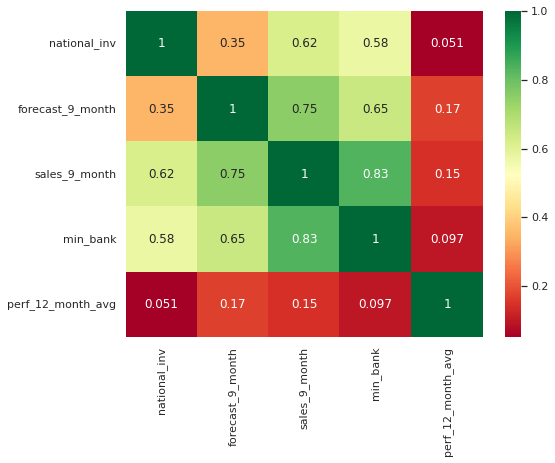

In [ ]:
#Lets see the correlation of all the variables by using heatmap
plt.figure(figsize=(8,6))
sns.heatmap(train_df.corr(),annot=True,cmap='RdYlGn')

##**One hot encoding**

In [33]:
cat_column

['potential_issue',
 'deck_risk',
 'oe_constraint',
 'ppap_risk',
 'stop_auto_buy',
 'rev_stop',
 'went_on_backorder']

In [34]:
cat_column.remove('went_on_backorder')

In [35]:
#One hot encoding
DF = train_df[cat_column]

DF = pd.get_dummies(DF, columns=DF.columns, drop_first=True)
DF.head()

potential_issue_Yes  deck_risk_Yes  oe_constraint_Yes  ppap_risk_Yes  \
0                    0              0                  0              0   
1                    0              0                  0              0   
2                    0              1                  0              0   
3                    0              0                  0              0   
4                    0              1                  0              0   

   stop_auto_buy_Yes  rev_stop_Yes  
0                  1             0  
1                  1             0  
2                  1             0  
3                  1             0  
4                  1             0

In [36]:
numeric_columns = train_df.describe().columns

In [37]:
#adding all neumericals columns to DF
for i in numeric_columns:
  DF[i] = train_df[i].copy()

In [38]:
#printing first 5 rows of DF
DF.head(5)

potential_issue_Yes  deck_risk_Yes  oe_constraint_Yes  ppap_risk_Yes  \
0                    0              0                  0              0   
1                    0              0                  0              0   
2                    0              1                  0              0   
3                    0              0                  0              0   
4                    0              1                  0              0   

   stop_auto_buy_Yes  rev_stop_Yes  national_inv  lead_time  forecast_9_month  \
0                  1             0           0.0        8.0               0.0   
1                  1             0           2.0        9.0               0.0   
2                  1             0           2.0        8.0               0.0   
3                  1             0           7.0        8.0               0.0   
4                  1             0           8.0        8.0               0.0   

   sales_9_month  min_bank  perf_12_month_avg  
0            0.0       0.0              0.225  
1            0.0       0.0              0.990  
2            0.0       0.0              0.225  
3            0.0       1.0              0.225  
4            4.0       2.0              0.225

##**Min max scaler**

In [39]:
#Min max scaler
column_names = list(DF.columns)

# column_names

#taking columns to do the minmaxscaling
DF_scaled = pd.DataFrame()

#using standardization as both numeric columns are in different scale
scaler = MinMaxScaler()
scaled = scaler.fit_transform(DF[DF.columns]) 
#print(scaled)
DF_scaled = pd.DataFrame(scaler.fit_transform(DF[DF.columns]))
DF_scaled.columns = column_names

In [40]:
#Printing first 5 rows of scaled data
DF_scaled.head()

potential_issue_Yes  deck_risk_Yes  oe_constraint_Yes  ppap_risk_Yes  \
0                  0.0            0.0                0.0            0.0   
1                  0.0            0.0                0.0            0.0   
2                  0.0            1.0                0.0            0.0   
3                  0.0            0.0                0.0            0.0   
4                  0.0            1.0                0.0            0.0   

   stop_auto_buy_Yes  rev_stop_Yes  national_inv  lead_time  forecast_9_month  \
0                1.0           0.0      0.361842   0.571429               0.0   
1                1.0           0.0      0.368421   0.642857               0.0   
2                1.0           0.0      0.368421   0.571429               0.0   
3                1.0           0.0      0.384868   0.571429               0.0   
4                1.0           0.0      0.388158   0.571429               0.0   

   sales_9_month  min_bank  perf_12_month_avg  
0       0.000000  0.000000           0.000000  
1       0.000000  0.000000           0.987097  
2       0.000000  0.000000           0.000000  
3       0.000000  0.133333           0.000000  
4       0.034043  0.266667           0.000000

In [40]:
#Saving cleaned data to Cleaned_df
DF_scaled.to_csv("Cleaned_df")

In [5]:
import pandas as pd
DF_scaled=pd.read_csv("/content/drive/MyDrive/data2/backorderprediction/Cleaned_df")

In [ ]:
#Assigning all independent variables to X and independent variables 
X = DF_scaled.copy()
#Assigning dependent variables y
y = DF_scaled['went_on_backorder'].copy()

In [7]:
#printing first 5 rows of X
X.head()

Unnamed: 0  potential_issue_Yes  deck_risk_Yes  oe_constraint_Yes  \
0           0                  0.0            0.0                0.0   
1           1                  0.0            0.0                0.0   
2           2                  0.0            1.0                0.0   
3           3                  0.0            0.0                0.0   
4           4                  0.0            1.0                0.0   

   ppap_risk_Yes  stop_auto_buy_Yes  rev_stop_Yes  national_inv  lead_time  \
0            0.0                1.0           0.0      0.361842   0.571429   
1            0.0                1.0           0.0      0.368421   0.642857   
2            0.0                1.0           0.0      0.368421   0.571429   
3            0.0                1.0           0.0      0.384868   0.571429   
4            0.0                1.0           0.0      0.388158   0.571429   

   forecast_9_month  sales_9_month  min_bank  perf_12_month_avg  
0               0.0       0.000000  0.000000           0.000000  
1               0.0       0.000000  0.000000           0.987097  
2               0.0       0.000000  0.000000           0.000000  
3               0.0       0.000000  0.133333           0.000000  
4               0.0       0.034043  0.266667           0.000000

## **SMOTE**
In our data set we have Imbalanced Data Distribution in our dependent variable, it generally happens when observations in one of the class are much higher i.e not defaulter or lower than the other classes i.e defaulter.

As Machine Learning algorithms tend to increase accuracy by reducing the error, they do not consider the class distribution.

Standard ML techniques such as Decision Tree and Logistic Regression have a bias towards the majority class, and they tend to ignore the minority class. They tend only to predict the majority class, hence, having major misclassification of the minority class in comparison with the majority class. In more technical words, if we have imbalanced data distribution in our dataset then our model becomes more prone to the case when the minority class has a negligible or very lesser recall.

**SMOTE**

**SMOTE (Synthetic Minority Oversampling Technique) – Oversampling is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them.**

In [53]:
#importing required libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

# the numbers before SMOTE
num_before = dict(Counter(y))

#perform SMOTE

# define pipeline
over = SMOTE(sampling_strategy=0.8)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_smote, y_smote = pipeline.fit_resample(X, y)


#the numbers after SMOTE
num_after =dict(Counter(y_smote))
print(num_before, num_after)

#using class_wieghts

class_weight = {0: 1,
                1: 6}

{'No': 1676567, 'Yes': 11293} {'No': 1676566, 'Yes': 1341253}


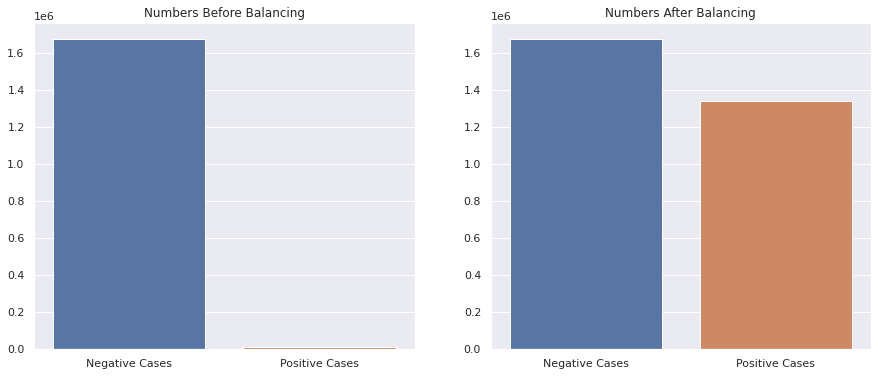

In [46]:
#Plotting bar graph for dependent variable counts before SMOTE and after SMOTE
labels = ["Negative Cases","Positive Cases"]
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(labels, list(num_before.values()))
plt.title("Numbers Before Balancing")
plt.subplot(1,2,2)
sns.barplot(labels, list(num_after.values()))
plt.title("Numbers After Balancing")
plt.show()

In [54]:
#Splitting the Data into Training data & Test Data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_smote,y_smote,test_size=.20,random_state=5)

# **Building** **Models**

### LogisticRegression

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics 
Lr=LogisticRegression()
pram_grid={'C':[0.001,0.01,0.1,1],'penalty':['l1','l2']}
clf_lr=GridSearchCV(Lr,pram_grid)
clf_lr.fit(x_train,y_train)
lr_y_pred=clf_lr.predict(x_test)
Accuracy_score=metrics.accuracy_score(y_test, lr_y_pred)

print('\n*********************\n')
print(confusion_matrix(y_test,lr_y_pred))
print('\n*********************\n')
print(classification_report(y_test, lr_y_pred))
print('\n*********************\n')
print("Accuracy Score:",Accuracy_score)



*********************

[[286116  48780]
 [ 80338 188330]]

*********************

              precision    recall  f1-score   support

          No       0.78      0.85      0.82    334896
         Yes       0.79      0.70      0.74    268668

    accuracy                           0.79    603564
   macro avg       0.79      0.78      0.78    603564
weighted avg       0.79      0.79      0.78    603564


*********************

Accuracy Score: 0.7860740534558058


In [ ]:
clf_lr.best_params_

### KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
knn = KNeighborsClassifier()
pram_grid={'n_neighbors':[3,4,5,7,8,10,12],'leaf_size':[5,10,15,20]}
clf_knn=GridSearchCV(knn,pram_grid)
clf_knn.fit(x_train,y_train)
knn_y_pred=clf_knn.predict(x_test)
Accuracy_score=metrics.accuracy_score(y_test, knn_y_pred)
print('\n*********************\n')
print(confusion_matrix(y_test, knn_y_pred))
print('\n*********************\n')
print(classification_report(y_test, knn_y_pred))
print('\n*********************\n')
print("Accuracy Score:",Accuracy_score)

### DecisionTreeClassifier

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
dtc = DecisionTreeClassifier()
pram_grid={'criterion':["gini"],'max_depth':[3,5,10],'min_samples_split':[5,7,10,14,18]}
clf_dtc=RandomizedSearchCV(dtc, pram_grid, n_jobs=1, cv=5)
clf_dtc.fit(x_train,y_train)
dtc_y_pred=clf_dtc.predict(x_test)
Accuracy_score=metrics.accuracy_score(y_test, dtc_y_pred)
print('\n*********************\n')
print(confusion_matrix(y_test,dtc_y_pred))
print('\n*********************\n')
print(classification_report(y_test, dtc_y_pred))
print('\n*********************\n')
print("Accuracy Score:",Accuracy_score)


*********************

[[305242  29654]
 [ 26455 242213]]

*********************

              precision    recall  f1-score   support

          No       0.92      0.91      0.92    334896
         Yes       0.89      0.90      0.90    268668

    accuracy                           0.91    603564
   macro avg       0.91      0.91      0.91    603564
weighted avg       0.91      0.91      0.91    603564


*********************

Accuracy Score: 0.907037199037716


### RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
Rf = RandomForestClassifier()
pram_grid={'n_estimators':[100,200,300],'min_samples_split':[5,7,10]}
clf_rf=RandomizedSearchCV(Rf,pram_grid)
clf_rf.fit(x_train,y_train)
rf_y_pred=clf_rf.predict(x_test)
Accuracy_score=metrics.accuracy_score(y_test, rf_y_pred)
print('\n*********************\n')
print(confusion_matrix(y_test,rf_y_pred))
print('\n*********************\n')
print(classification_report(y_test, rf_y_pred))
print('\n*********************\n')
print("Accuracy Score:",Accuracy_score)


### VotingClassifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train, y_train)

In [ ]:
import xgboost
xgb = xgboost.XGBRegressor()
xgb.fit(x_train, y_train)

In [ ]:
from sklearn.ensemble import VotingClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
Rf = RandomForestClassifier()
dtc = DecisionTreeClassifier()
estimators=[("gnb",gnb),("gbc",gbc),("xgb",xgb)]
for estimator in estimators:
    x=cross_val_score(estimator[1],x_train,y_train,cv=10,scoring="accuracy")
    print(estimator[0],np.round(np.mean(x),2))

vc=VotingClassifier(estimators=estimators,voting="soft")
x=cross_val_score(vc,x_train,y_train,cv=10,scoring="accuracy")
print(np.round(np.mean(x),2))

vc = VotingClassifier(estimators=estimators,voting='hard')
x = cross_val_score(vc,x_train,y_train,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            vc = VotingClassifier(estimators=estimators,voting='soft',weights=[i,j,k])
            x = cross_val_score(vc,x_train,y_train,cv=10,scoring='accuracy')
            print("for i={},j={},k={}".format(i,j,k),np.round(np.mean(x),2))

**Our imported dataset had 1687860 rows and 23 columns. when we started analyzing our data it had 2 columns local_bo_qty and pieces_past_due
with 98% missing values we romved those variables,also had one variable with missing values 100894 replace them with median
after cleaned data we performed EDA where we found that variables like fore_cast_3_month, fore_cast_6_month, fore_cast_9_month
sales_1_month,sales_3_month sales_6_month sales_9_month,perf_6_month_avg were highly correalted to each other we kept first of them and removed remaining variables. Used one hot encodeing for the categorical variables,used min max scaler to scale down the variables.As our dataset had outliers and was imbalanced. capped the outliers by IQR range and SMOTE technic to balance dataset.Used logistic regression,kneighbors classifier, decision tree classifier, random forest classifier and voting classifier with hyperparameter tunning to train the model**